## Predicting heart disease using machine learning model
we are going to take following approach:
1. Problem definition
2. data
3. evaluation
4. features
5. modeling
6. experimentation

# 1.Problem Definition
. Given clinical parameters about a patient, can we predict weither heart disease or not

## 2. DATA try to fetch the daqta from real mwoprld examples

In [2]:
## prepaing the tools to use for data analysis
#numpy, pandas, matplolib

In [2]:
#import all tools we need

#regular EDA (exploratory data analysis)and plotting library


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models for scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#modle evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [3]:
df=pd.read_csv("heart-disease.csv")

In [4]:
df.shape

(303, 14)

## Data exploration (data analysis or EDA)

In [5]:
df.head(9)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
# as u can see the target variables are almost same values so may be can call it as balanced classification problem

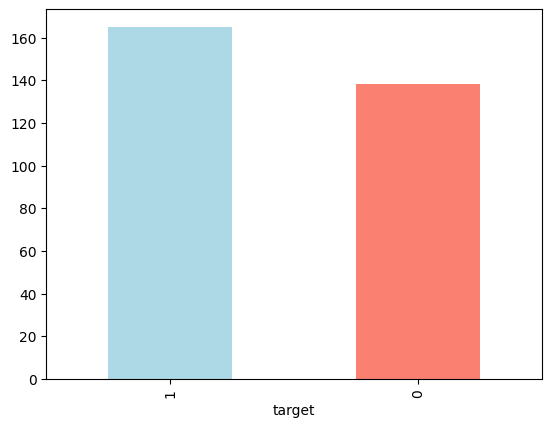

In [9]:
df['target'].value_counts().plot(kind='bar', color={'salmon', 'lightblue'});

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# comparing mutual regression= comparing two columns

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


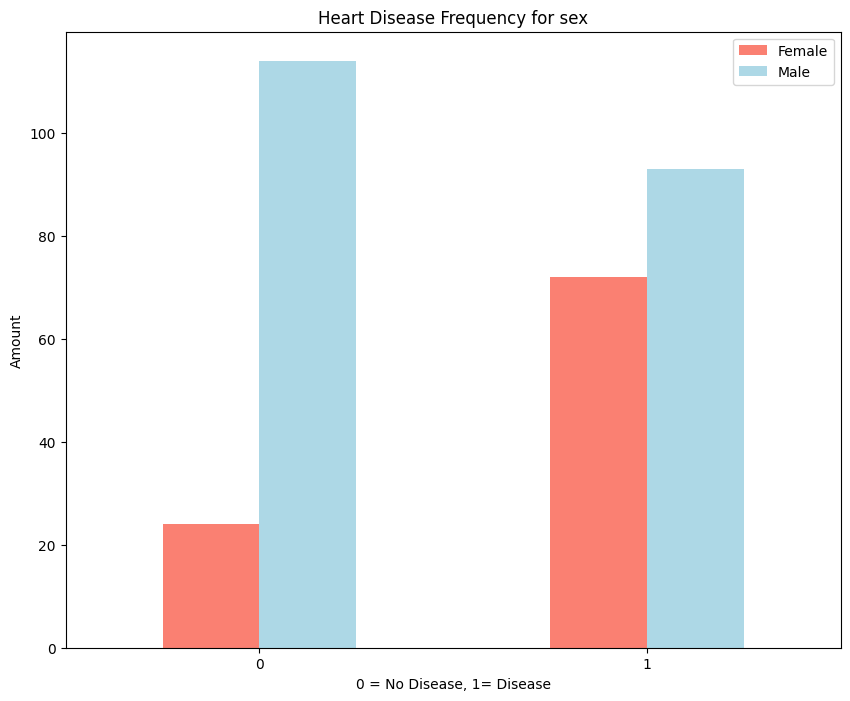

In [16]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,8),
                                    color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Age vs Heart Rate for Heart disease

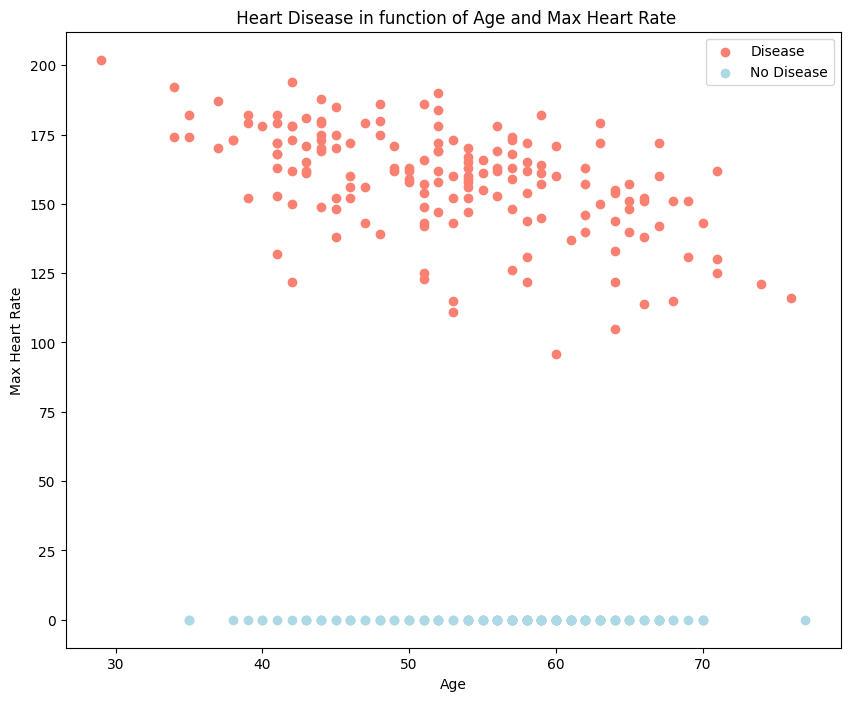

In [17]:
# create figure
plt.figure(figsize=(10, 8))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# scatter with -ve
plt.scatter(df.age[df.target==0],
            df.target[df.target==0],
            c="lightblue");

# ADD SOMEHELPFUL INFO
plt.title(" Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

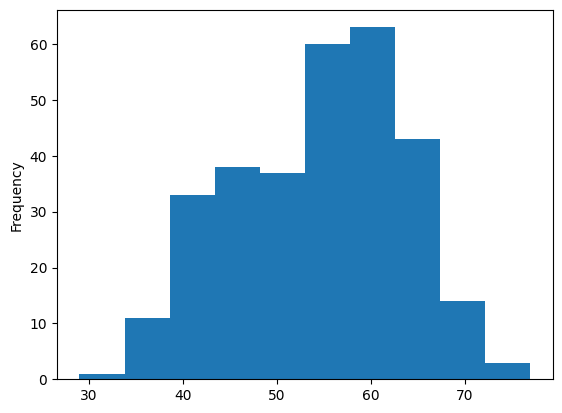

In [18]:
df.age.plot.hist();

In [19]:
# Haert Disaese Frequency with chest pain

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


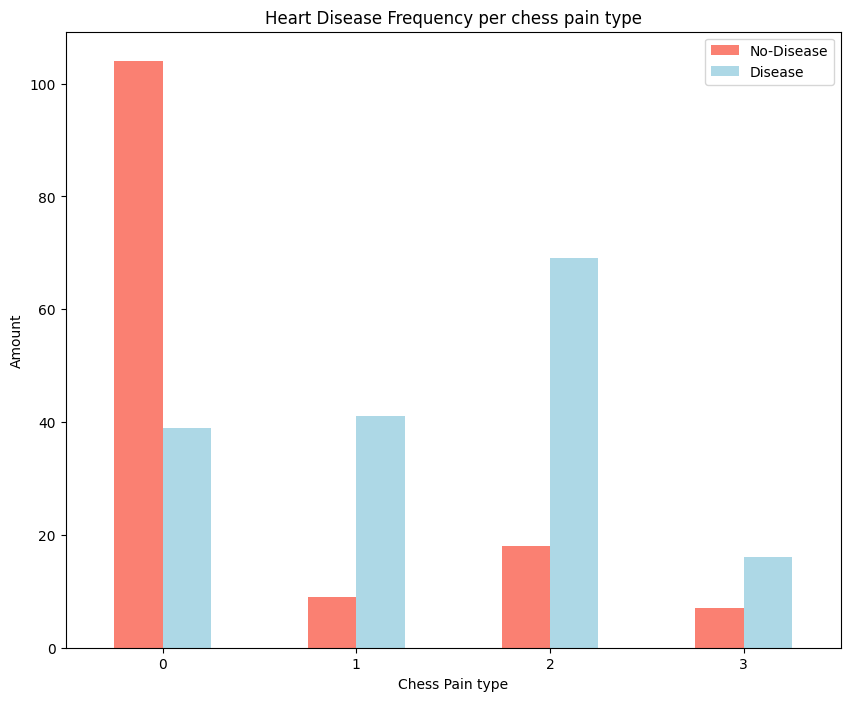

In [21]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                    figsize=(10,8),
                                    color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency per chess pain type")
plt.xlabel("Chess Pain type")
plt.ylabel("Amount")
plt.legend(["No-Disease", "Disease"])
plt.xticks(rotation=0);

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


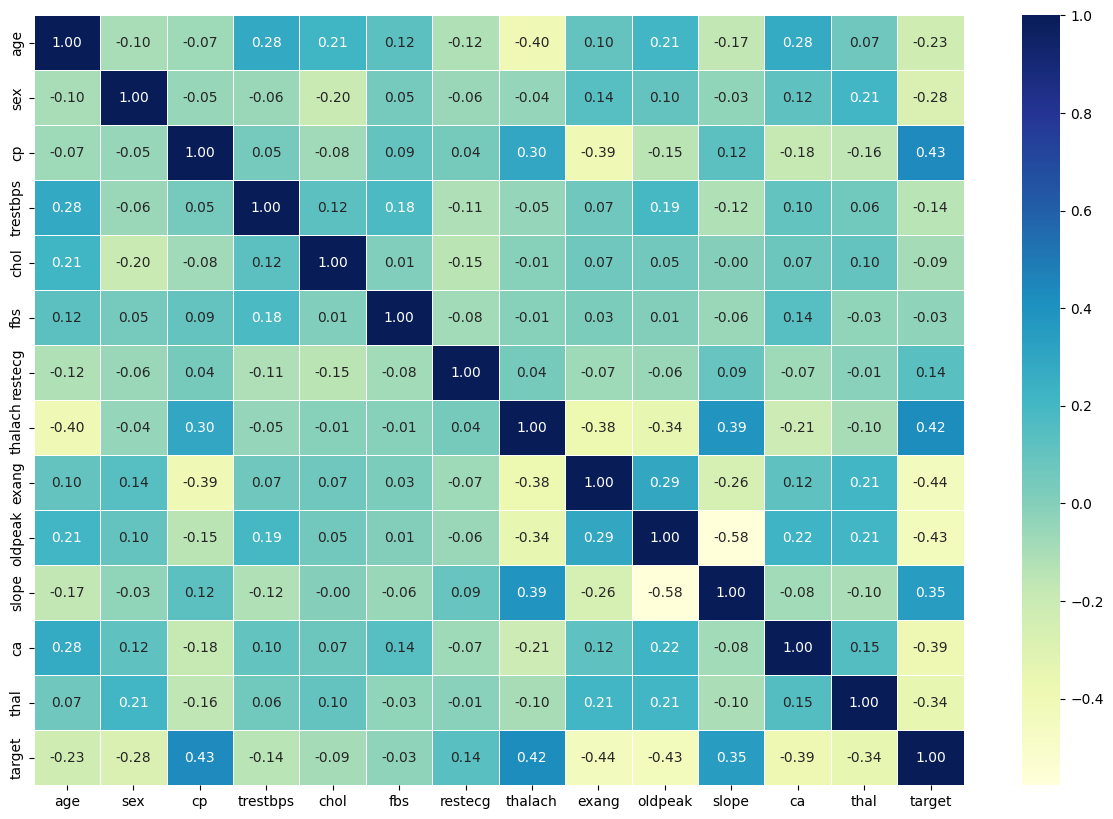

In [24]:
# lets make out correaltion matrix visual or prettier
corr_matrix=df.corr()
fig, ax =plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot =True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# bottom,top =ax.get_ylim() if our graph doesnt fit properly or if data is missplacing
# ax.set_ylim(bottom + 0.5, top-0.5)

In [25]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


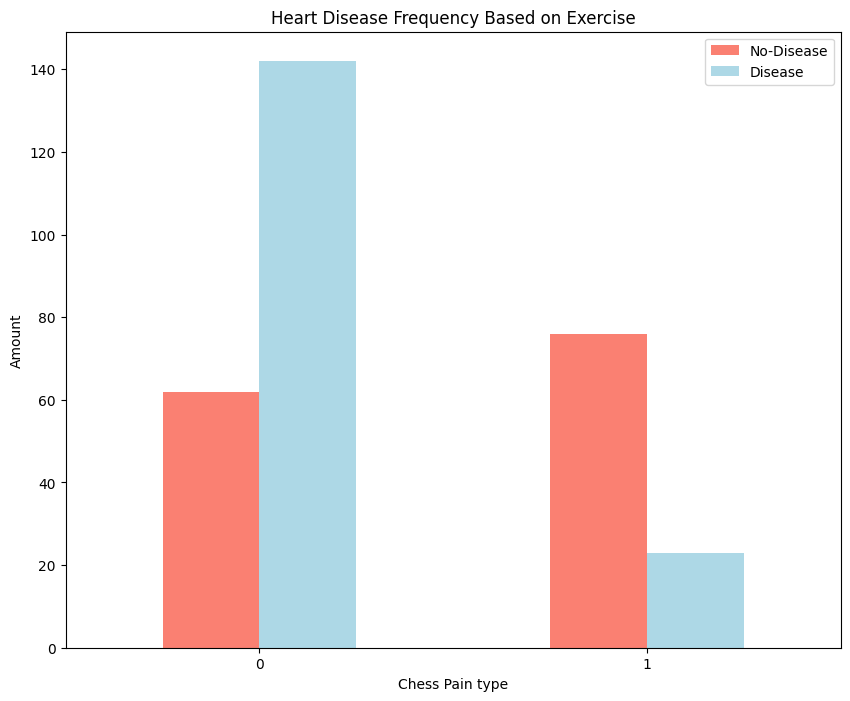

In [26]:
pd.crosstab(df.exang, df.target).plot(kind="bar", 
                                    figsize=(10,8),
                                    color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency Based on Exercise")
plt.xlabel("Chess Pain type")
plt.ylabel("Amount")
plt.legend(["No-Disease", "Disease"])
plt.xticks(rotation=0);

# Modeling

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# splitting data into dependent and independent variables
x=df.drop("target", axis=1)


y=df["target"]

In [29]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [31]:
#split data into train and test set
np.random.seed(42)

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [32]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [33]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data splitted into train and test, its time to create a machine learning model
we will train model on training set
we will fit the model on test set

we're going to try 3 different models to get better accurcay
1. Logistic Regression(despite its name, is a linear model for classification model for classification rather than regression)
2. K-Nearest Neighbours classifier
3. Random Forest Classification

In [34]:
# put models in a dicitionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

#create a fucntion to fit and score models
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate
    models: a dicitionary of scikit learn models
    x_train: training data
    y_train: trainig labels
    x_test:test data
    y_test:test labels
    """
    #set random seed
    np.random.seed(42)
    #make a dicitionary to keep models scores
    model_scores={}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #evaluate the model 
        model_scores[name]=model.score(x_test, y_test)
    return model_scores

In [35]:
model_scores=fit_score(models=models, x_train=x_train, x_test=x_test,y_train=y_train, y_test=y_test)
model_scores

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## MOdel Comparison

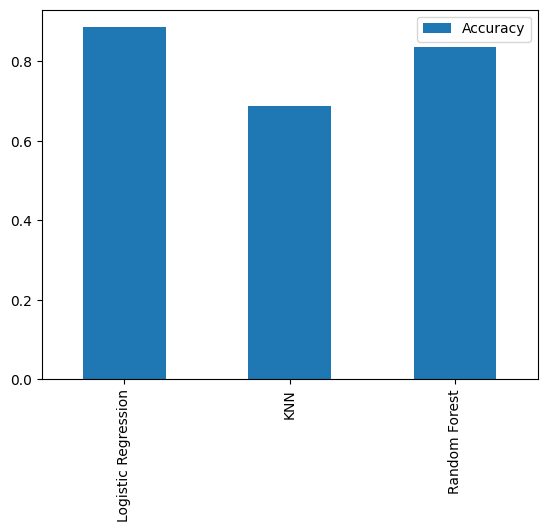

In [36]:
model_compare=pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

Now we've got baseline model... 
Lets look at following
1. Hyperparameter tuning
2. COnfusion matrix
3. Feature importance
4. Cross Validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC curve
10. AUC(area under curve)

## Hyper Parameter tuning

In [37]:
train_scores= []
test_scores= []

# create a list of diff values for n_neighbors
neighbors=range(1, 21)

#set up KNN instance
knn=KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the model
    knn.fit(x_train, y_train)

    #update the trainging scores list
    train_scores.append(knn.score(x_train, y_train))

    #update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data:75.41%


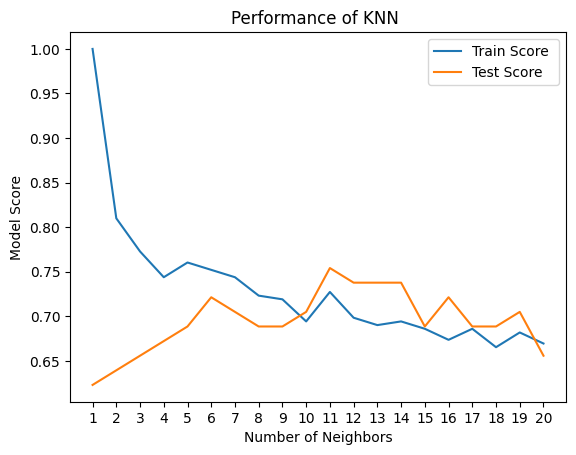

In [40]:
plt.plot(neighbors, train_scores, label="Train Score ")
plt.plot(neighbors, test_scores, label="Test Score")
plt.title("Performance of KNN ")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors") 
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data:{max(test_scores)*100:.2f}%")

## Hyper parameters tuning by RandomizedSearchCV

* Logistic regression(),
* Randomforestclassifier(),
we are using RSCV

In [41]:
# create a hyper parameter logistic regression
log_reg_grid={"C":np.logspace(-4, 4, 20),
              "solver":["liblinear"]}

#create a hypparams for grid RadomForestClassifier
rf_grid={"n_estimators":np.arange(10, 1000, 50),
         "max_depth":[None, 3, 5,10],
         "min_samples_split":np.arange(2, 20, 2),
         "min_samples_leaf":np.arange(1,20,2)}

now we've got grids ready for both models by using Randomizedsearchcv

In [42]:
#Tune logistic regression

np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid, 
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit the random hyper parameter search model for logisticregression model
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [44]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## now we've tuned logreg, lets do same for randomclass

In [45]:
np.random.seed(42)

#set up hyperparameter
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

#fit the model by 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [77]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
#evaluate the randomized search RandomForestClassifier()
rs_rf.score(x_test, y_test)

0.8688524590163934

In [47]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyper Pramter by using GridSearchCV

since our logistic regression model provides the best scores so far we'll try gridsearcgcv to improve

In [48]:
# create a hyper parameter logistic regression
log_reg_grid={"C":np.logspace(-4, 4, 30),
              "solver":["liblinear"]}

#setup grid for logreg
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(x_train, y_train)

#create a hypparams for grid RadomForestClassifier
rf_grid={"n_estimators":np.arange(10, 1000, 50),
         "max_depth":[None, 3, 5,10],
         "min_samples_split":np.arange(2, 20, 2),
         "min_samples_leaf":np.arange(1,20,2)}

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [49]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [ ]:
#create a hypparams for grid RadomForestClassifier
rf_grid={"n_estimators":np.arange(10, 1000, 50),
         "max_depth":[None, 3, 5,10],
         "min_samples_split":np.arange(2, 20, 2),
         "min_samples_leaf":np.arange(1,20,2)}

#setup grid for rf
gs_rf=GridSearchCV(RandomForestClassifier(),
                        param_grid=rf_grid,
                        cv=5,
                        verbose=True)
gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


In [ ]:
gs_rf.score(x_test, y_test)